# Importing Required Libraries

In [1]:
import pandas as pd #data Processing
import numpy as np #linear algebra
import seaborn as sns #data visulization 'plotting'
from sklearn.preprocessing import LabelEncoder #for label encoding
import matplotlib.pyplot as plt # Data Visualization, magic functio which shows plot inside the J Notebook
from scipy import stats # For scientific Mathematics Calculation
%matplotlib inline 

In [2]:
train = pd.read_csv('train_s3TEQDk.csv') #reading tarin dataset
test = pd.read_csv('test_mSzZ8RL.csv')  #reading test dataset

# Exploratory Data Analysis


In [3]:
print(train.shape) # reading no of rows and columns of a train data
print(test.shape)  #reading no.of rows and columns of a test data

(245725, 11)
(105312, 10)


#####      ID : Unique Identifier for a row
#####      Gender : Gender of the Customer
#####      Age  :   Age of the Customer (in Years)
#####     Region_Code   :   Code of the Region for the customers
#####     Occupation   :  Occupation Type for the customer
#####     Channel_Code  :  Acquisition Channel Code for the Customer (Encoded)
#####     Vintage     : Vintage for the Customer (In Months)
#####    Credit_Product  :   If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)
#####    AvgAccountBalance   :  Average Account Balance for the Customer in last 12 Months
#####    Is_Active   :   If the Customer is Active in last 3 Months
#####    Is_Lead(Target)   :  If the Customer is interested for the Credit Card. 0 : Customer is not interested, 1 : Customer is interested

In [4]:
train.head() #reading first five rows of train data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test.head() # reading first five rows of test data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
train.describe() # reading statistical data mean, std, max, IQR

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


Both the train and test data ['Age', 'Vintage'] data has same

In [7]:
test.describe() # reading statistical data mean, std, max, IQR

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [8]:
train.info() # reading summary of a train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
test.info() # reading summary of a train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [10]:
train[['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']].nunique() # Shows no.of unique variables

Gender             2
Region_Code       35
Occupation         4
Channel_Code       4
Credit_Product     2
Is_Active          2
dtype: int64

In [11]:
test[['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']].nunique() # Shows no.of unique variables

Gender             2
Region_Code       35
Occupation         4
Channel_Code       4
Credit_Product     2
Is_Active          2
dtype: int64

In [12]:
train.isnull().sum() # Checking for Missing Values

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [13]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [14]:
train.isnull().sum() /train.shape[0] * 100 # Checking for Percentage of Missing values

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [15]:
test.isnull().sum() /test.shape[0] * 100 # Checking for Percentage of Missing values

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [16]:
train['Gender'].value_counts(normalize=True)

Male      0.546127
Female    0.453873
Name: Gender, dtype: float64

In [17]:
test['Gender'].value_counts(normalize=True)

Male      0.547943
Female    0.452057
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

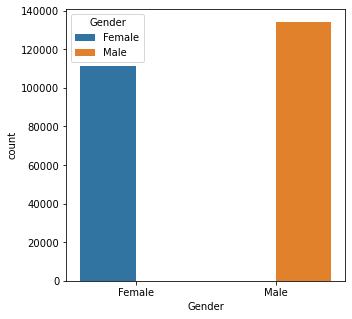

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x = train['Gender'], hue="Gender", data=train)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

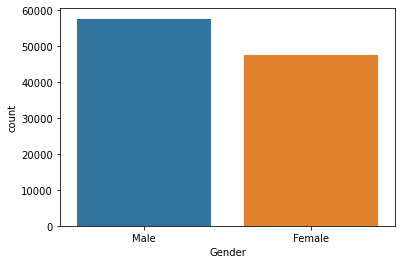

In [19]:
sns.countplot(test['Gender'])

<AxesSubplot:xlabel='Age'>

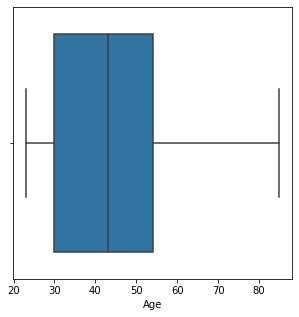

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(x=train['Age'])  # Checking for outliers for 'Age' train dataset

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

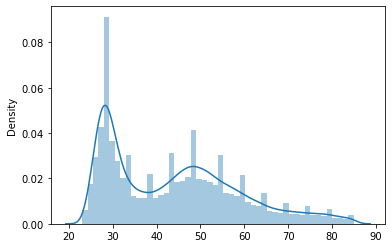

In [21]:
sns.distplot(x = train['Age']) # ploting normal distribution for AGE

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

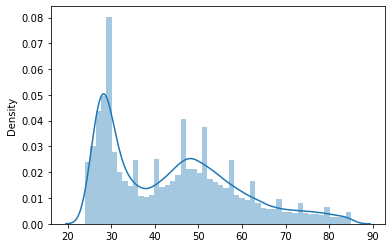

In [22]:
sns.distplot(x = test['Age']) # ploting normal distribution for AGE

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

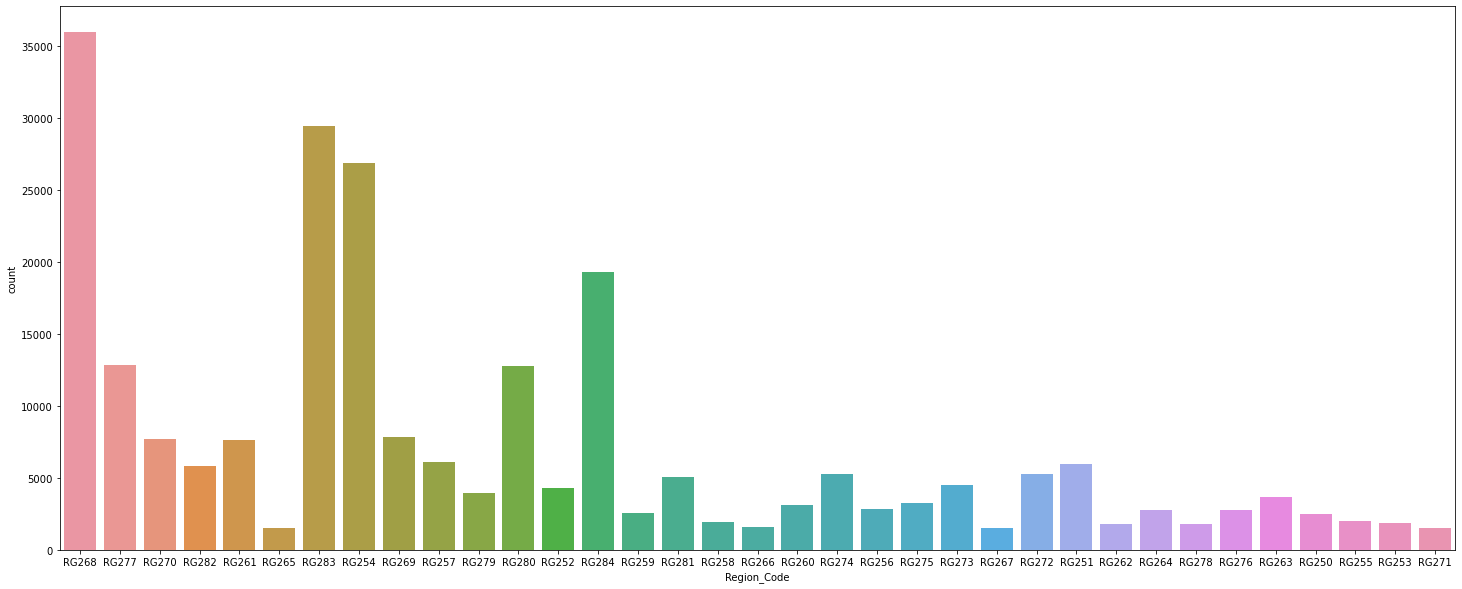

In [23]:
plt.figure(figsize=(25,10))
sns.countplot(x = train['Region_Code'])

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

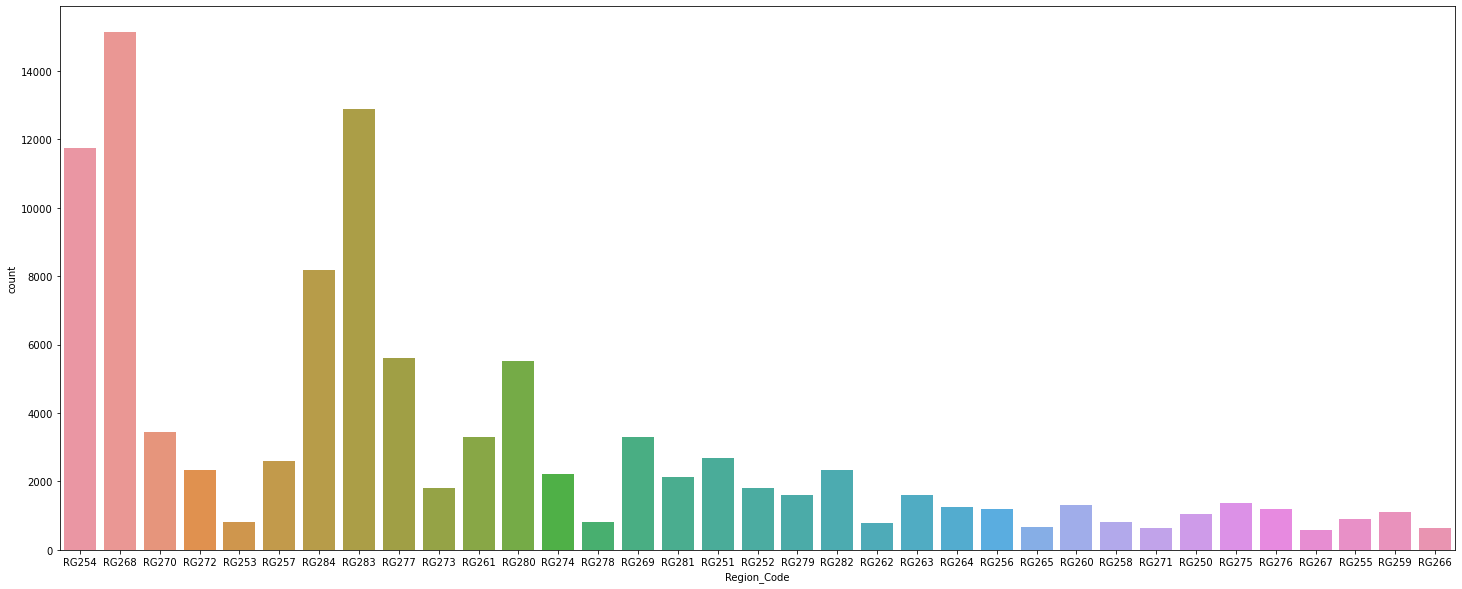

In [24]:
plt.figure(figsize=(25,10))
sns.countplot(x = test['Region_Code'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

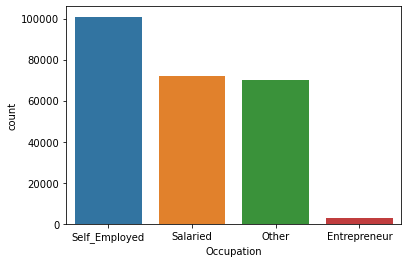

In [25]:
sns.countplot(x = train['Occupation'], order = train['Occupation'].value_counts().index)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

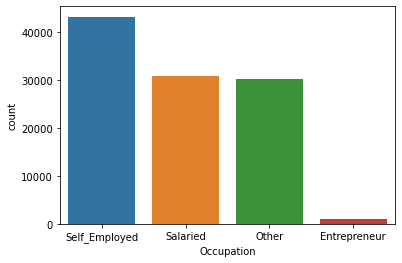

In [26]:
sns.countplot(x = test['Occupation'], order = test['Occupation'].value_counts().index)

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

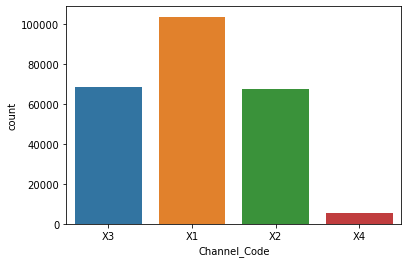

In [27]:
sns.countplot(x = train['Channel_Code'])

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

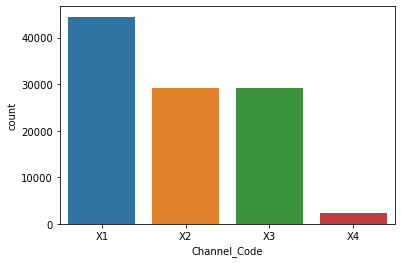

In [28]:
sns.countplot(x = test['Channel_Code'])

<AxesSubplot:xlabel='Vintage'>

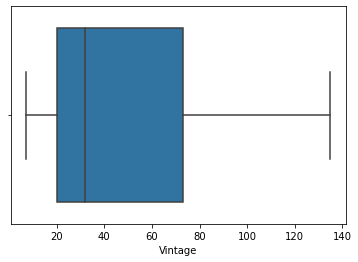

In [29]:
sns.boxplot(x=train['Vintage'])  # Checking for outliers for 'Vintage' train dataset

<AxesSubplot:xlabel='Vintage'>

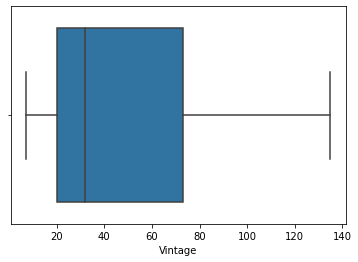

In [30]:
sns.boxplot(x=test['Vintage'])  # Checking for outliers for 'Vintage' train dataset

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

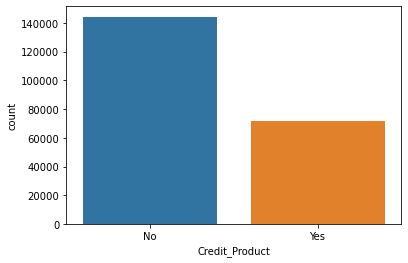

In [31]:
sns.countplot(x=train['Credit_Product'])

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

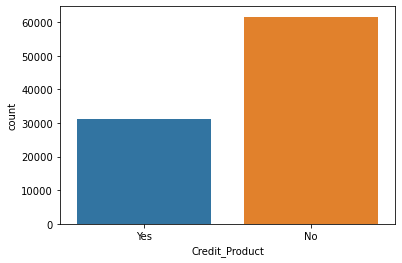

In [32]:
sns.countplot(x=test['Credit_Product'])

<AxesSubplot:xlabel='Avg_Account_Balance'>

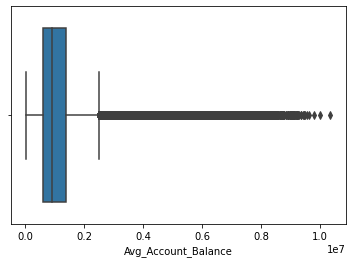

In [33]:
sns.boxplot(x=train['Avg_Account_Balance'])  # Checking for Outliers for 'Avg_Account_Balance' for train dataset

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

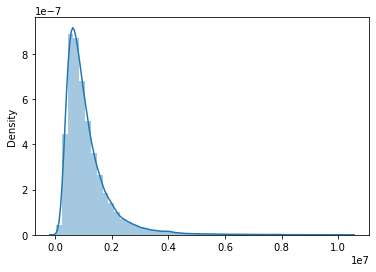

In [34]:
sns.distplot(x=train['Avg_Account_Balance'])  # Checking for Outliers for 'Avg_Account_Balance' for train dataset

<AxesSubplot:xlabel='Avg_Account_Balance'>

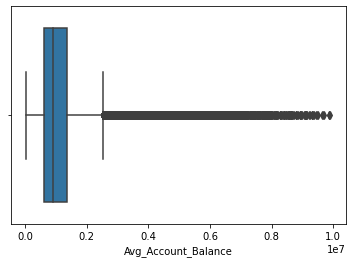

In [35]:
sns.boxplot(x=test['Avg_Account_Balance'])  # Checking for Outliers for 'Avg_Account_Balance' for train dataset

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

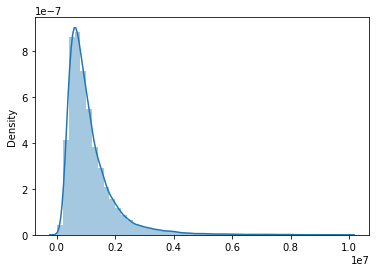

In [36]:
sns.distplot(x=test['Avg_Account_Balance'])  # Checking for Outliers for 'Avg_Account_Balance' for train dataset

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

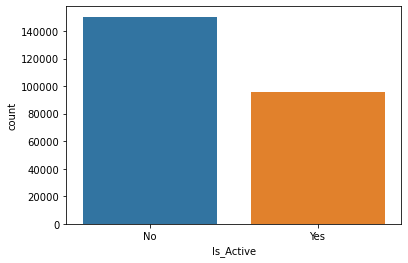

In [37]:
sns.countplot(x=train['Is_Active']) # checking for skewness of a dataset

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

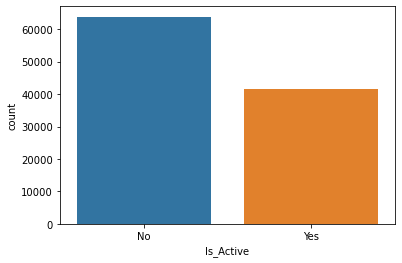

In [38]:
sns.countplot(x=test['Is_Active']) # checking for skewness of a dataset

<AxesSubplot:xlabel='Avg_Account_Balance'>

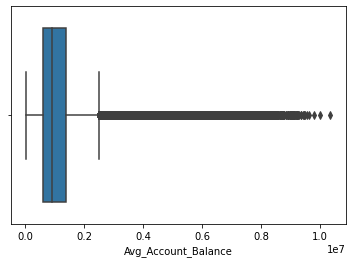

In [39]:
sns.boxplot(x=train['Avg_Account_Balance']) # Ploting box plot for 'Avg_Account_Balance'

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

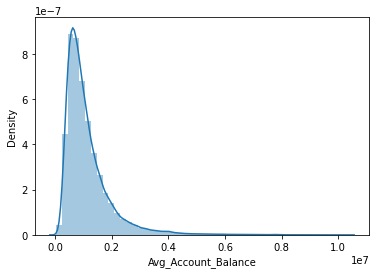

In [40]:
sns.distplot(train['Avg_Account_Balance'])  # Checking for normalization of plot

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

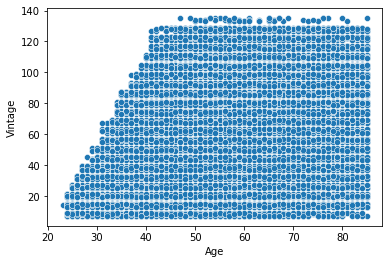

In [41]:
sns.scatterplot(x=train['Age'],y=train['Vintage'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Vintage'>

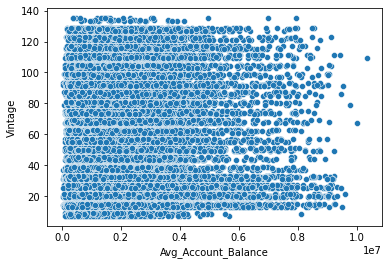

In [42]:
sns.scatterplot(x=train['Avg_Account_Balance'],y=train['Vintage'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Age'>

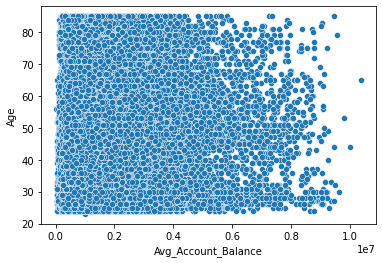

In [43]:
sns.scatterplot(x=train['Avg_Account_Balance'],y=train['Age'])

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

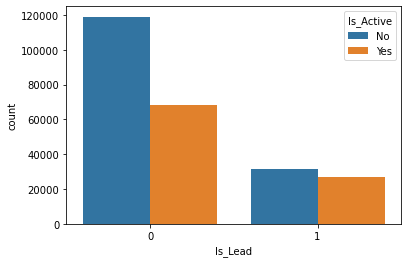

In [44]:
sns.countplot(x='Is_Lead', data = train, hue='Is_Active') # checking for skewness of a dataset

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

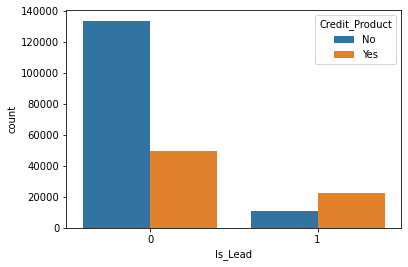

In [45]:
sns.countplot(x='Is_Lead', data = train, hue='Credit_Product') # checking for skewness of a dataset

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

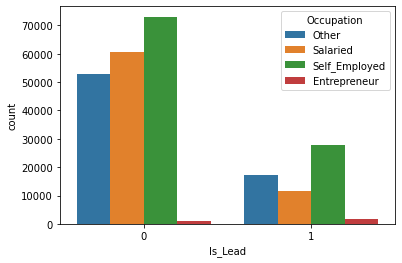

In [46]:
sns.countplot(x='Is_Lead', data = train, hue='Occupation') # checking for skewness of a dataset

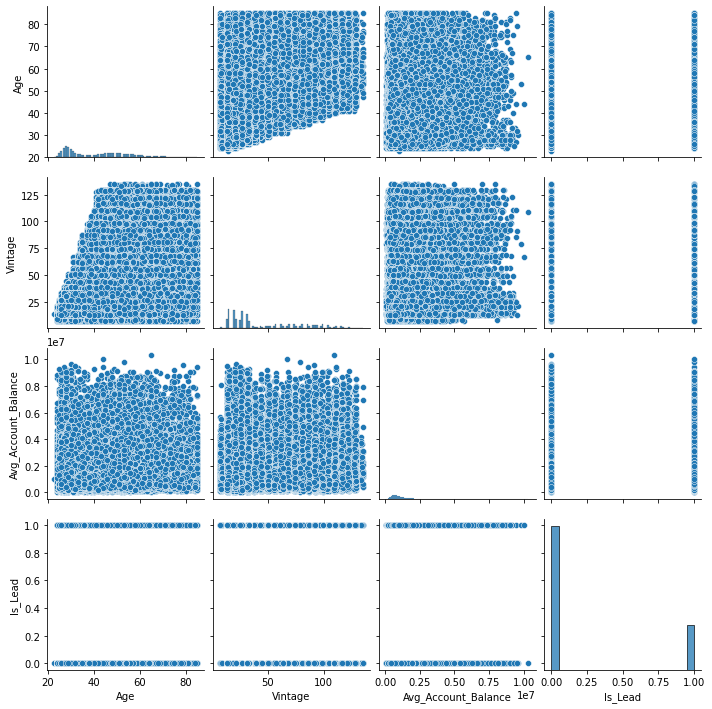

In [47]:
sns.pairplot(train[['Age', 'Vintage', 'Avg_Account_Balance','Is_Lead']])

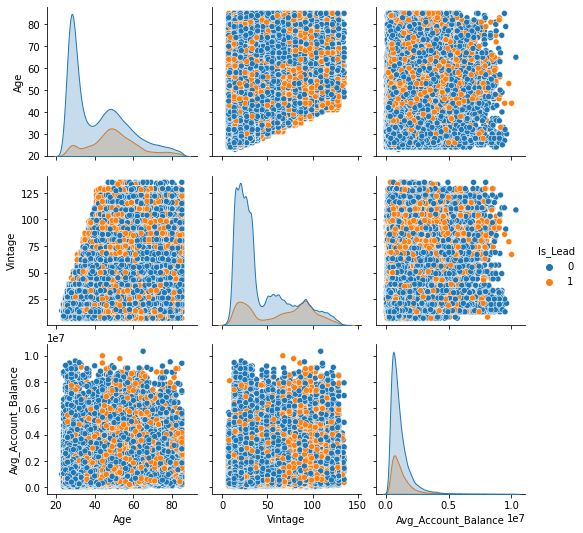

In [48]:
sns.pairplot(train[['Age', 'Vintage', 'Avg_Account_Balance','Is_Lead']], hue= 'Is_Lead')

In [49]:
train.isnull().sum() # Checking for missing values

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

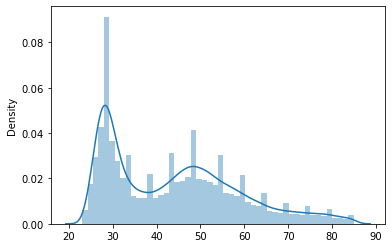

In [51]:
sns.distplot(x=train['Age'])

In [52]:
print(train['Age'].max())  # Checking for max and Min Age
print(train['Age'].min()) 

85
23


In [53]:
print(test['Age'].max())
print(test['Age'].min())

85
24


C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

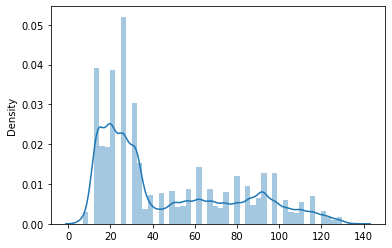

In [54]:
sns.distplot(x=train['Vintage']) # Checking For Normal Distribution of plot

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

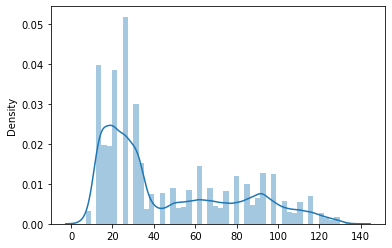

In [55]:
sns.distplot(x=test['Vintage'])

In [56]:
test.isnull().sum() # CHecking for Missing values for test data

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [57]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [58]:
train['Credit_Product'] = train['Credit_Product'].fillna('Not')

In [59]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [60]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [61]:
test.isnull().sum() / test.shape[0] * 100 # Checking for Missing value percentage

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [62]:
test['Credit_Product'] = test['Credit_Product'].fillna('Not') # filling the missing value with 'NO'

# Feature Engineering

In [63]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

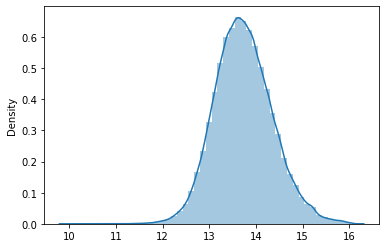

In [64]:
sns.distplot(x=train['Avg_Account_Balance'])

In [65]:
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

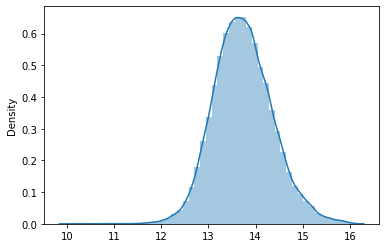

In [66]:
sns.distplot(x=test['Avg_Account_Balance'])

In [67]:
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Age'>

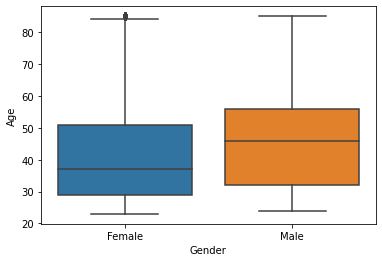

In [68]:
sns.boxplot(x=train['Gender'], y=train['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Avg_Account_Balance'>

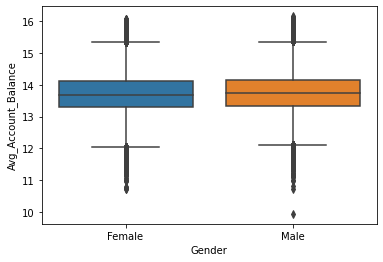

In [69]:
sns.boxplot(x=train['Gender'], y=train['Avg_Account_Balance'])

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

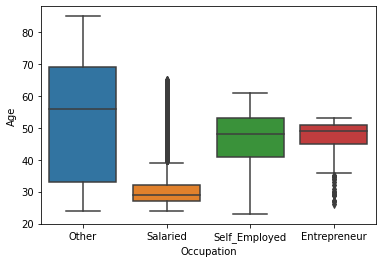

In [70]:
sns.boxplot(x=train['Occupation'], y=train['Age'])

<AxesSubplot:xlabel='Credit_Product', ylabel='Age'>

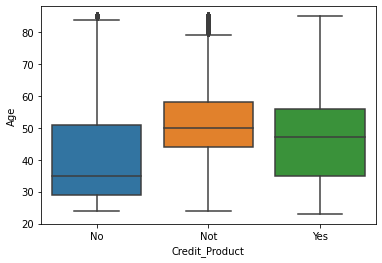

In [71]:
sns.boxplot(x=train['Credit_Product'], y=train['Age'])

<AxesSubplot:xlabel='Credit_Product', ylabel='Avg_Account_Balance'>

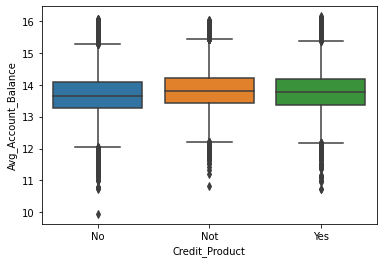

In [72]:
sns.boxplot(x=train['Credit_Product'], y=train['Avg_Account_Balance'])

In [73]:
train['Gender'] = train['Gender'].map(lambda x: 1 if x=='Female' else 0) #encoding with 0 and 1

In [74]:
test['Gender'] = test['Gender'].map(lambda x: 1 if x=='Female' else 0) #encoding with 0 and 1

In [75]:
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')

In [76]:
enc = LabelEncoder()
train['Region_Code'] = enc.fit_transform(train['Region_Code'])
test['Region_Code'] = enc.fit_transform(test['Region_Code'])

In [77]:
train['Region_Code'] = train['Region_Code'].astype('category')
test['Region_Code'] = test['Region_Code'].astype('category')

In [78]:
train['Occupation'] = enc.fit_transform(train['Occupation'])
test['Occupation'] = enc.fit_transform(test['Occupation'])

In [79]:
train['Occupation'] = train['Occupation'].astype('category')
test['Occupation'] = test['Occupation'].astype('category')

In [80]:
train['Credit_Product'] = train['Credit_Product'].map(lambda x: 1 if x=='Yes' else 0) #encoding with 0 and 1
test['Credit_Product'] = test['Credit_Product'].map(lambda x: 1 if x=='Yes' else 0) #encoding with 0 and 1

In [81]:
train['Credit_Product'] = train['Credit_Product'].astype('category')
test['Credit_Product'] = test['Credit_Product'].astype('category')

In [82]:
train['Is_Active'] = train['Is_Active'].map(lambda x: 1 if x=='Yes' else 0) #encoding with 0 and 1
test['Is_Active'] = test['Is_Active'].map(lambda x: 1 if x=='Yes' else 0) #encoding with 0 and 1

In [83]:
train['Is_Active'] = train['Is_Active'].astype('category')
test['Is_Active'] = test['Is_Active'].astype('category')

In [84]:
train['Channel_Code'] = enc.fit_transform(train['Channel_Code'])
test['Channel_Code'] = enc.fit_transform(test['Channel_Code'])

In [85]:
train['Channel_Code'] = train['Channel_Code'].astype('category')
test['Channel_Code'] = test['Channel_Code'].astype('category')

In [86]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,18,1,2,43,0,13.860193,0,0
1,IDD62UNG,1,30,27,2,0,32,0,13.274205,0,0
2,HD3DSEMC,1,56,18,3,2,26,0,14.210464,1,0
3,BF3NC7KV,0,34,20,2,0,19,0,13.061453,0,0
4,TEASRWXV,1,30,32,2,0,33,0,13.695360,0,0


In [87]:
# Normalizing the 'Avg_Account_Balance'
#train['Avg_Account_Balance'] = (train['Avg_Account_Balance'] - train['Avg_Account_Balance'].min()) / (train['Avg_Account_Balance'].max() - train['Avg_Account_Balance'].min())

In [88]:
train['Age'] = (train['Age'] - train['Age'].min()) / (train['Age'].max() - train['Age'].min())

In [89]:
train['Vintage'] = (train['Vintage'] - train['Vintage'].min()) / (train['Vintage'].max() - train['Vintage'].min())

In [90]:
#test['Avg_Account_Balance'] = (test['Avg_Account_Balance'] - test['Avg_Account_Balance'].min()) / (test['Avg_Account_Balance'].max() - test['Avg_Account_Balance'].min())

In [91]:
test['Age'] = (test['Age'] - test['Age'].min()) / (test['Age'].max() - test['Age'].min())

In [92]:
test['Vintage'] = (test['Vintage'] - test['Vintage'].min()) / (test['Vintage'].max() - test['Vintage'].min())

In [99]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,18,1,2,43,0,13.860193,0,0
1,IDD62UNG,1,30,27,2,0,32,0,13.274205,0,0
2,HD3DSEMC,1,56,18,3,2,26,0,14.210464,1,0
3,BF3NC7KV,0,34,20,2,0,19,0,13.061453,0,0
4,TEASRWXV,1,30,32,2,0,33,0,13.695360,0,0


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  object  
 1   Gender               245725 non-null  category
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  category
 4   Occupation           245725 non-null  category
 5   Channel_Code         245725 non-null  category
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       245725 non-null  category
 8   Avg_Account_Balance  245725 non-null  float64 
 9   Is_Active            245725 non-null  category
 10  Is_Lead              245725 non-null  int64   
dtypes: category(6), float64(1), int64(3), object(1)
memory usage: 10.8+ MB


In [101]:
train.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.176838,0.230814
Vintage,0.631242,1.000000,0.201592,0.279642
Avg_Account_Balance,0.176838,0.201592,1.000000,0.073291
Is_Lead,0.230814,0.279642,0.073291,1.000000


<AxesSubplot:>

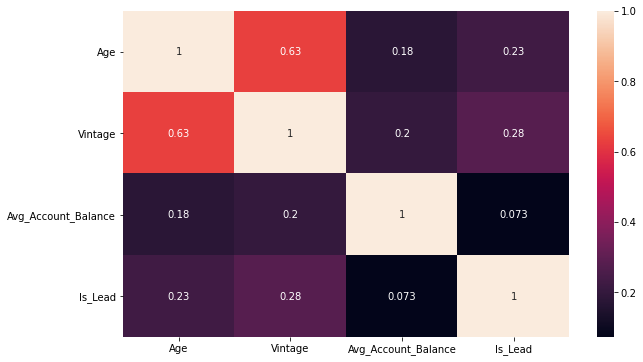

In [102]:
# check
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)

In [103]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,0,29,4,1,0,25,1,13.517598,0
1,CCMEWNKY,0,43,18,1,1,49,0,13.738129,0
2,VK3KGA9M,0,31,20,2,0,14,0,12.282798,0
3,TT8RPZVC,0,29,22,1,0,33,0,13.674028,0
4,SHQZEYTZ,1,29,20,1,0,19,0,13.395572,0


In [104]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [105]:
train_x = train[['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]

In [106]:
train_y = train['Is_Lead']

In [107]:
test_x = test[['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]

In [108]:
train_x.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,73,18,1,2,43,0,13.860193,0
1,1,30,27,2,0,32,0,13.274205,0
2,1,56,18,3,2,26,0,14.210464,1
3,0,34,20,2,0,19,0,13.061453,0
4,1,30,32,2,0,33,0,13.695360,0


### Splitting the data into train and test

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y,test_size=0.30,random_state = 400)

### Balancing Target variable

In [111]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_ros, y_ros = rus.fit_resample(x_train, y_train)

In [112]:
y_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: Is_Lead, dtype: float64

# Modelling

# Logistic Regression

In [114]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [115]:
import sklearn.linear_model as linear_model

In [116]:
log = linear_model.LogisticRegression()

In [117]:
LR = log.fit(X_ros, y_ros)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [118]:
LR.classes_

array([0, 1], dtype=int64)

In [119]:
LR.predict_proba(x_test)

array([[0.23726079, 0.76273921],
       [0.75848298, 0.24151702],
       [0.1748797 , 0.8251203 ],
       ...,
       [0.53632045, 0.46367955],
       [0.74046144, 0.25953856],
       [0.22594425, 0.77405575]])

In [120]:
lr_pred= LR.predict(x_test)

In [121]:
lr_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
print(accuracy_score(y_test, lr_pred))


0.6468026804850918


In [123]:
crossval_scores = cross_val_score(linear_model.LogisticRegression(), X_ros, y_ros, scoring='roc_auc', cv=10)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [124]:
print(crossval_scores)
print(crossval_scores.mean())

[0.71219819 0.71293888 0.71368501 0.7102004  0.71330919 0.7225275
 0.70778968 0.71100202 0.71976511 0.71167896]
0.7135094935384714


In [125]:
#probability prediction for X_test
LR.predict_proba(x_test)

array([[0.23726079, 0.76273921],
       [0.75848298, 0.24151702],
       [0.1748797 , 0.8251203 ],
       ...,
       [0.53632045, 0.46367955],
       [0.74046144, 0.25953856],
       [0.22594425, 0.77405575]])

In [126]:
#RocCurve
import sklearn.metrics as metrics
metrics.roc_curve(y_test,LR.predict_proba(x_test)[:,1])

(array([0.00000000e+00, 0.00000000e+00, 3.53650558e-05, ...,
        9.99593302e-01, 9.99593302e-01, 1.00000000e+00]),
 array([0.00000000e+00, 5.82580833e-05, 5.82580833e-05, ...,
        9.99941742e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.88615356, 0.88615356, 0.88143134, ..., 0.19528489, 0.1952704 ,
        0.19031285]))

In [127]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,LR.predict_proba(x_test)[:,1])

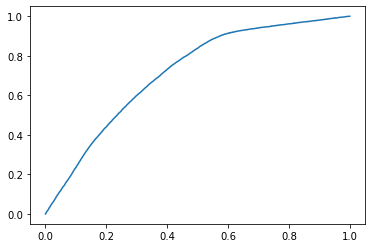

In [128]:
from sklearn.metrics import roc_curve, auc
plt.plot(fpr,tpr,"-")

# RandomForest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold

In [130]:
rf = RandomForestClassifier()

In [131]:
rnd = RandomForestClassifier(n_estimators=300,oob_score=True,random_state=400)

In [132]:
rnd.fit(X_ros, y_ros)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=400)

In [133]:
rnd.oob_score_

0.6943194805826424

In [134]:
rnd.feature_importances_

array([0.02025402, 0.20987908, 0.13671243, 0.03277218, 0.08515461,
       0.19946115, 0.01710776, 0.27971317, 0.01894561])

In [135]:
rnd_pred= rnd.predict(x_test)
rnd_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [136]:
print(accuracy_score(y_test, rnd_pred))

0.6883936080740117


In [137]:
pred = rnd.predict(test_x)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [138]:
crossval_score_rdf = cross_val_score(RandomForestClassifier(), X_ros, y_ros, scoring='roc_auc', cv=10)

In [139]:
print(crossval_scores)
print('Cv_score',crossval_score_rdf.mean())

[0.71219819 0.71293888 0.71368501 0.7102004  0.71330919 0.7225275
 0.70778968 0.71100202 0.71976511 0.71167896]
Cv_score 0.757572599619226


In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rnd_pred)
cm

array([[38456, 18097],
       [ 4874, 12291]], dtype=int64)

In [141]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, rnd_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     56553
           1       0.40      0.72      0.52     17165

    accuracy                           0.69     73718
   macro avg       0.65      0.70      0.64     73718
weighted avg       0.78      0.69      0.71     73718



In [142]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, rnd_pred)
roc_auc

0.6980246973252651

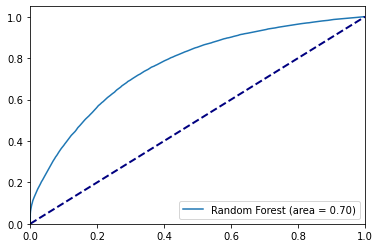

In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rnd.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()

In [149]:
tes = test['ID']

In [150]:
df = pd.DataFrame(tes)

In [151]:
df['Is_Lead'] = pred

In [152]:
df.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [153]:
df.to_csv('submission_.csv', index=False)